# PROJEKT 1: Notas de filmes da Netflix na IMDB

   Nesse projeto utilizaremos um banco de dados contento diversos títulos originais da Netflix. Nosso principal interesse aqui é verificar a relação entre as característiscas de um título e seu desempenho na IMDB. Será um projeto simples composto por poucas etapas.
    
            key features: EDA, Data Visualization, Matplotlib, Seaborn

#### Objetivos:

   * Definir gêneros e idiomas mais populares
   * Verificar a performace de cada gênero e idioma
   * Definir idiomas mais assistidos
   * Runtime-Score Ratio   
   * Verificar correlações entre gêneros e outras características
   
#### Etapas:
   * Data Preparation
   * Data Analysis  
   * Gráficos & Resultados

### ETAPA 01: Data Preparation


In [1]:
#importar libs
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#importar Database (link: )
db = pd.read_csv('data/NetflixOriginals.csv', encoding = "ISO-8859-1")

In [2]:
#Verificação incial do DataFrame
db.head()

,Title,Genre,Premiere,Runtime,IMDB Score,Language
0,Enter the Anime,Documentary,"August 5, 2019",58,2.5,English/Japanese
1,Dark Forces,Thriller,"August 21, 2020",81,2.6,Spanish
2,The App,Science fiction/Drama,"December 26, 2019",79,2.6,Italian
3,The Open House,Horror thriller,"January 19, 2018",94,3.2,English
4,Kaali Khuhi,Mystery,"October 30, 2020",90,3.4,Hindi


In [3]:
db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 584 entries, 0 to 583
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Title       584 non-null    object 
 1   Genre       584 non-null    object 
 2   Premiere    584 non-null    object 
 3   Runtime     584 non-null    int64  
 4   IMDB Score  584 non-null    float64
 5   Language    584 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 27.5+ KB


In [4]:
db.describe()

,Runtime,IMDB Score
count,584.000000,584.000000
mean,93.577055,6.271747
std,27.761683,0.979256
min,4.000000,2.500000
25%,86.000000,5.700000
50%,97.000000,6.350000
75%,108.000000,7.000000
max,209.000000,9.000000


In [5]:
#Verificar valores nulos
db.isnull().sum()

Title         0
Genre         0
Premiere      0
Runtime       0
IMDB Score    0
Language      0
dtype: int64

    Vemos que se trata de um banco de dados limpo, sem valores nulos, facilitando nosso trabalho diminuindo a necessidade de realizar etapas de Data Cleaning.

  Vamos verificar como estão distribuidos os gêneros e idiomas dos títulos

In [6]:
#Categorias
db.Genre.value_counts()

Documentary                             159
Drama                                    77
Comedy                                   49
Romantic comedy                          39
Thriller                                 33
                                       ... 
Romantic comedy-drama                     1
Heist film/Thriller                       1
Musical/Western/Fantasy                   1
Horror anthology                          1
Animation/Christmas/Comedy/Adventure      1
Name: Genre, Length: 115, dtype: int64

    Temos 115 categorias distintas. Isso se deve principalmente a filmes que possuem mais de um gênero. Podemos até tentar  retirar alguma informação, mas fazer um gráfico disso seria desastroso. Vamos filtrar para ver apenas as 10 primeiras   categorias e tentar tirar alguma informação. 

In [7]:
#categorias
db_top10genre = db.Genre.value_counts().nlargest(10).to_frame().reset_index().rename(columns={'Genre':'Genre Counts','index':'Genre'})
db_top10genre

,Genre,Genre Counts
0,Documentary,159
1,Drama,77
2,Comedy,49
3,Romantic comedy,39
4,Thriller,33
5,Comedy-drama,14
6,Crime drama,11
7,Biopic,9
8,Horror,9
9,Action,7


In [8]:
#Idiomas
db_top10language = db.Language.value_counts().nlargest(10).to_frame().reset_index().rename(columns={'Language':'Language Counts','index':'Language'})
db_top10language

,Language,Language Counts
0,English,401
1,Hindi,33
2,Spanish,31
3,French,20
4,Italian,14
5,Portuguese,12
6,Indonesian,9
7,Japanese,6
8,Korean,6
9,German,5


<AxesSubplot:xlabel='Genre Counts', ylabel='Genre'>

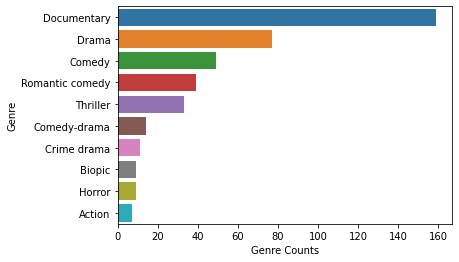

In [9]:
sns.barplot(data = db_top10genre, x = 'Genre Counts', y = 'Genre')

    Existem categorias multi-idiomas, vamos separa-los para facilitar a visualização e então selecionar os 10 idiomas mais    utilizados.

#### Definir Top 10 Categorias e Idiomas

             Genre  Genre Counts
0      Documentary           159
1            Drama            77
2           Comedy            49
3  Romantic comedy            39
4         Thriller            33
5     Comedy-drama            14
6      Crime drama            11
7           Biopic             9
8           Horror             9
9           Action             7


<AxesSubplot:xlabel='Genre Counts', ylabel='Genre'>

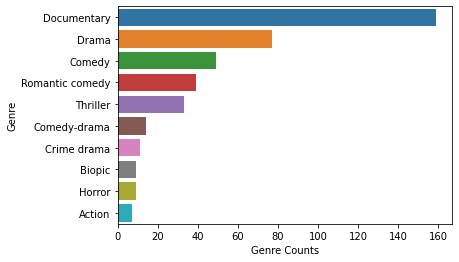

In [10]:
#TOP 10 Categorias
#Pegar 10 primeiras categorias
db.Language.value_counts().nlargest(10).to_frame().reset_index().rename(columns={'Language':'Language Counts','index':'Language'})
db_top10genre = db.Genre.value_counts().nlargest(10)
#Transformar em Data Frame
db_top10genre = db_top10genre.to_frame().reset_index().rename(columns={'Genre':'Genre Counts','index':'Genre'})
print(db_top10genre)
#plots placeholder
sns.barplot(data = db_top10genre,x = 'Genre Counts', y = 'Genre')
#db_top10genre.plot.pie(y = 'Genre Counts')

    E a grande campeã é a categoria "Documentários" com 159 títulos! Vemos uma larga vantagem em relação a segunda colocada "Drama" com 77 títulos.

Em relação aos idiomas, primeiro precisamos separar categorias multi-idiomas

In [11]:
#Separar multi-idiomas (/)
db['First Language'] = db['Language'].str.split('/').str[0]

  First Language  Counts
0        English     419
1        Spanish      34
2          Hindi      33
3         French      20
4        Italian      14


<AxesSubplot:xlabel='Counts', ylabel='First Language'>

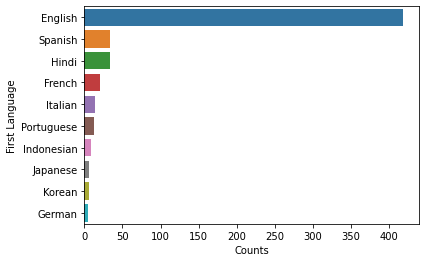

In [12]:
#TOP 10 Idiomas
#Definir 10 línguas mais faladas
db_10lan = db['First Language'].value_counts().nlargest(10)
#Transformar em dataframe
db_10lan = db_10lan.to_frame().reset_index().rename(columns = {'index':'First Language','First Language':'Counts'})
print(db_10lan.head())
#Plots placeholder
sns.barplot(data = db_10lan,x = 'Counts', y = 'First Language')

    Como esperado, inglês lidera com a maioria absoluta de títulos em língua inglesa

Agora que possuimos as categorias e idiomas mais populares, podemos utilizar essa informação para filtrar nosso DataFrame

In [13]:
#Filtrar generos escolhidos
genre_filter = db.Genre.isin(db_top10genre['Genre'])
db_filter_genre = db[genre_filter]
#Filtrar idiomas escolhidos
language_filter = db['First Language'].isin(db_10lan['First Language'])
db_filter_language = db[language_filter]

Por fim, vamos retirar também o ano de lançamento, e teremos um DataFrame assim:

In [14]:
#Retirar ano de lançamento
db['Year'] = db['Premiere'].str.split(' ').str[-1]
db.head()

,Title,Genre,Premiere,Runtime,IMDB Score,Language,First Language,Year
0,Enter the Anime,Documentary,"August 5, 2019",58,2.5,English/Japanese,English,2019
1,Dark Forces,Thriller,"August 21, 2020",81,2.6,Spanish,Spanish,2020
2,The App,Science fiction/Drama,"December 26, 2019",79,2.6,Italian,Italian,2019
3,The Open House,Horror thriller,"January 19, 2018",94,3.2,English,English,2018
4,Kaali Khuhi,Mystery,"October 30, 2020",90,3.4,Hindi,Hindi,2020


   Year  Count
3  2021     71
0  2020    183
1  2019    125
2  2018     99
4  2017     66


<AxesSubplot:xlabel='Count', ylabel='Year'>

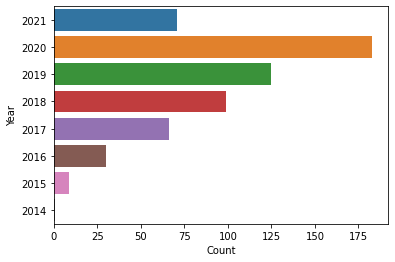

In [15]:
#Separar títulos por ano de lançamento
db_year = db.Year.value_counts().to_frame().reset_index().rename(columns={'index':'Year','Year':'Count'}).sort_values('Year', ascending = False)
print(db_year.head())
#plot placeholder
sns.barplot(data = db_year, x = 'Count', y = 'Year')

### ETAPA 2: Data Analysis

#### Notas mais altas no IMDB

In [16]:
#Nota mais alta no IMBD
db_imdbscore = db.sort_values('IMDB Score',ascending=False).iloc[0:10]
db_imdbscore

,Title,Genre,Premiere,Runtime,IMDB Score,Language,First Language,Year
583,David Attenborough: A Life on Our Planet,Documentary,"October 4, 2020",83,9.0,English,English,2020
582,Emicida: AmarElo - It's All For Yesterday,Documentary,"December 8, 2020",89,8.6,Portuguese,Portuguese,2020
581,Springsteen on Broadway,One-man show,"December 16, 2018",153,8.5,English,English,2018
580,Winter on Fire: Ukraine's Fight for Freedom,Documentary,"October 9, 2015",91,8.4,English/Ukranian/Russian,English,2015
579,Taylor Swift: Reputation Stadium Tour,Concert Film,"December 31, 2018",125,8.4,English,English,2018
578,Ben Platt: Live from Radio City Music Hall,Concert Film,"May 20, 2020",85,8.4,English,English,2020
577,Dancing with the Birds,Documentary,"October 23, 2019",51,8.3,English,English,2019
576,Cuba and the Cameraman,Documentary,"November 24, 2017",114,8.3,English,English,2017
573,Klaus,Animation/Christmas/Comedy/Adventure,"November 15, 2019",97,8.2,English,English,2019
571,13th,Documentary,"October 7, 2016",100,8.2,English,English,2016


In [17]:
#Agrupar gêneros de acordo com o score no IMDB
db_10genre = db_filter_genre.groupby(by = 'Genre',as_index = False).mean().sort_values('IMDB Score',ascending = False)
db_10genre

,Genre,Runtime,IMDB Score
5,Documentary,78.962264,6.936478
4,Crime drama,118.181818,6.745455
1,Biopic,107.555556,6.400000
6,Drama,107.311688,6.342857
3,Comedy-drama,105.142857,6.214286
8,Romantic comedy,100.692308,5.848718
9,Thriller,105.121212,5.563636
2,Comedy,95.653061,5.506122
0,Action,108.000000,5.414286
7,Horror,99.333333,5.255556


In [18]:
#Agrupar idiomas de acordo com o score no IMDB
db_10language = db_filter_language.groupby('First Language', as_index= False).mean().sort_values('IMDB Score',ascending= False)
db_10language

,First Language,Runtime,IMDB Score
6,Japanese,99.333333,6.400000
0,English,90.832936,6.391408
9,Spanish,94.000000,6.314706
8,Portuguese,91.250000,6.216667
3,Hindi,115.787879,5.981818
7,Korean,115.833333,5.916667
4,Indonesian,103.777778,5.844444
1,French,92.700000,5.770000
2,German,99.600000,5.640000
5,Italian,98.357143,5.542857


[Text(0.5, 1.0, 'Nota média por idioma')]

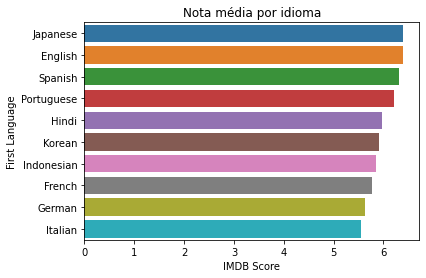

In [19]:
#Nota média por idioma
#plot
sns.barplot(data = db_10language,x = 'IMDB Score', y ="First Language").set(title ="Nota média por idioma")

### Gráficos & Resultados

* Gráfico de desempenho por gênero
* Gráfico desempenho por idioma
* Ratio Score - Runtime
* Titulos por ano
* Melhores Títulos
* Duração média por categoria

#### Número de títulos por gênero'.

C:\Users\lucas\AppData\Local\Temp/ipykernel_14248/2116980221.py:26: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(db_10genre["Genre"].str.upper())


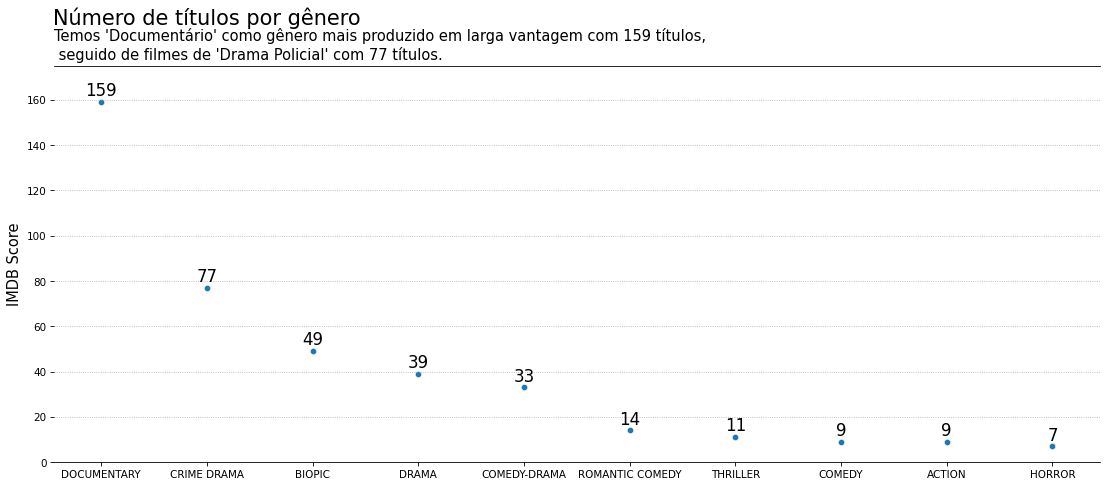

In [20]:
#plots Gêneros com maior nota no IMDB

#plot
fig, ax = plt.subplots(figsize=(18, 7), dpi=75)
sns.scatterplot(data = db_top10genre,y = 'Genre Counts', x = 'Genre', palette= 'deep')

#eixos
xmin, xmax = ax.get_xlim()
ymin, ymax = ax.get_ylim()

#títulos & Eixos
ax.set_title ("Temos 'Documentário' como gênero mais produzido em larga vantagem com 159 títulos,"
              "\n seguido de filmes de 'Drama Policial' com 77 títulos.", 
              loc = 'left', 
              fontsize = 14)
ax.text(s = 'Número de títulos por gênero',
        fontsize = 20,
        x=xmin*1.01, 
        y=ymax*1.16)
ax.set_ylim(0,175)
ax.grid(axis = 'y',linestyle = 'dotted')
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.set_xlabel('')
ax.set_ylabel('IMDB Score', fontsize = 14)
ax.set_xticklabels(db_10genre["Genre"].str.upper())

#Colocar pontos das notas (row _3).
number_list = [0,1,2,3,4,5,6,7,8,9]
ticks = db_top10genre.reset_index(drop=True)
for i in number_list:
    ax.text(x = i, y = ticks['Genre Counts'][i]+5, s=ticks['Genre Counts'][i], horizontalalignment= 'center', verticalalignment='center', fontsize=16)

#### Verificar relação entre 'Score IMDB' e 'Tempo de Tela'.

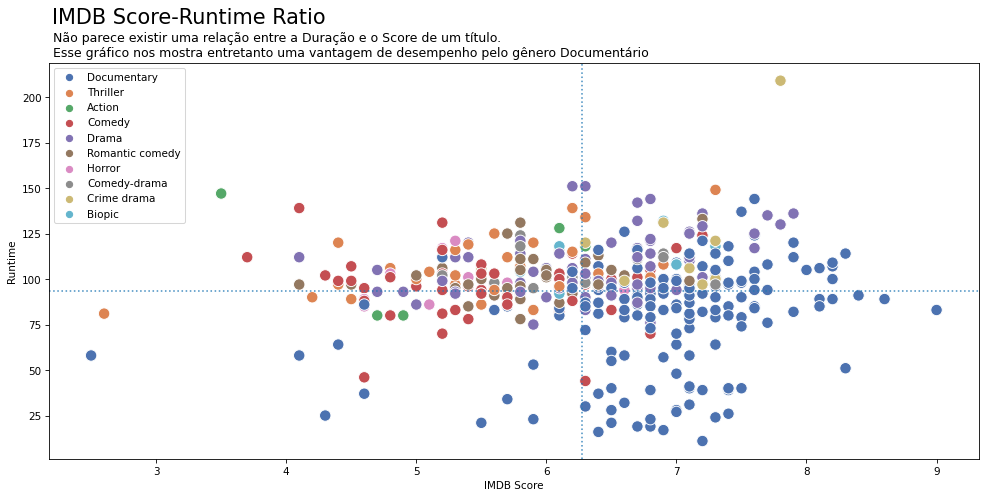

In [21]:
db_ratio = db.groupby('Genre', as_index = False).mean()

#Plotar Gráfico
fig, ax = plt.subplots(figsize=(16, 7), dpi=75)
sns.scatterplot(data = db_filter_genre, 
                x = 'IMDB Score', 
                y = 'Runtime',
                hue = 'Genre',
                s = 120,
                palette= 'deep'
                )

#Mean Lines
meanx= db['IMDB Score'].mean()
meany= db['Runtime'].mean()
xline = ax.axvline(meanx, linestyle='dotted', alpha=0.8)
yline = ax.axhline(meany, linestyle='dotted', alpha=0.8)

#Títulos e Eixos
ax.set_title(' Não parece existir uma relação entre a Duração e o Score de um título.'
             '\n Esse gráfico nos mostra entretanto uma vantagem de desempenho pelo gênero Documentário ',
            fontdict = {'fontsize': 12},
            loc = 'left')
xmin, xmax = ax.get_xlim()
ymin, ymax = ax.get_ylim()
ax.text(s = 'IMDB Score-Runtime Ratio',
        fontsize = 20,
        x=2.2, 
        y=ymax*1.10)
ax.legend(loc = 'upper left', fontsize = 'medium')

Text(0.5, 0, '')

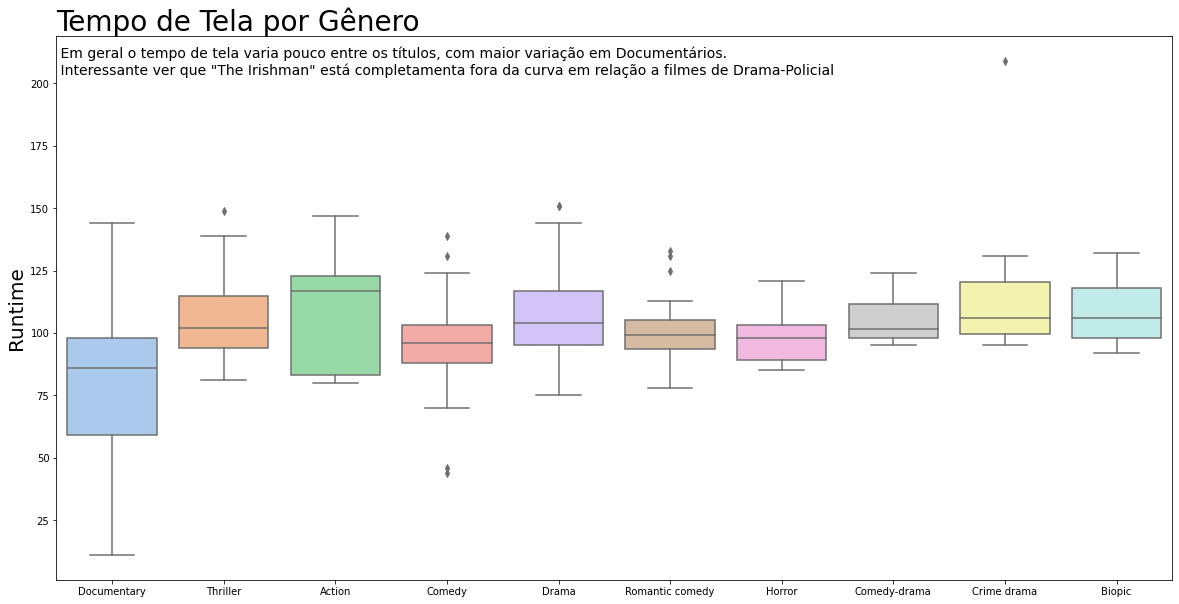

In [22]:
#Variação de duração por Gênero

#Plotar gráfico
f, ax = plt.subplots(figsize=(20, 10))
sns.boxplot(data = db_filter_genre, x = 'Genre', y = 'Runtime', palette= 'pastel')

#eixos
xmin, xmax = ax.get_xlim()
ymin, ymax = ax.get_ylim()

#Título & Eixos
ax.set_title('Tempo de Tela por Gênero',
             fontdict = {'fontsize': 28},
            loc = 'left')
ax.text(s = ' Em geral o tempo de tela varia pouco entre os títulos, com maior variação em Documentários.'
        '\n Interessante ver que "The Irishman" está completamenta fora da curva em relação a filmes de Drama-Policial',
        fontsize = 14,
        x=xmin, 
        y=ymax*0.93)
ax.set_ylabel('Runtime',fontsize = 20)
ax.set_xlabel('')

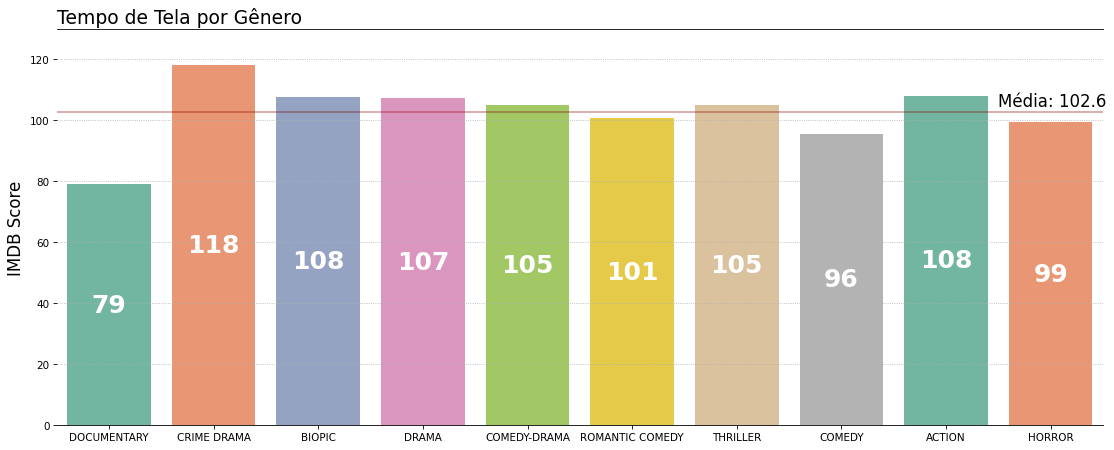

In [23]:
#Meantime per category

#plot
fig, ax = plt.subplots(figsize=(18, 7), dpi=75)
sns.barplot(data = db_10genre,y = 'Runtime', x = 'Genre', palette= 'Set2')

#eixos
xmin, xmax = ax.get_xlim()
ymin, ymax = ax.get_ylim()

#títulos & Eixos
ax.set_title ("Tempo de Tela por Gênero", 
              loc = 'left', 
              fontsize = 18)
ax.set_ylim(0,130)
ymean = db_10genre['Runtime'].mean()
yline = ax.axhline(ymean, linestyle='solid', alpha=0.4, color = 'darkred')
ax.text(s = f'Média: {round(ymean,2)}',
       x = 8.5,y = ymean + 2,
       fontsize = 16)
ax.grid(axis = 'y',linestyle = 'dotted')
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.set_xlabel('')
ax.set_ylabel('IMDB Score', fontsize = 16)
ax.set_xticklabels(db_10genre["Genre"].str.upper(), fontsize = 10)

#verificar tuplas
#for row in db_10genre.itertuples():
#    print(row)

#Colocar pontos das notas (row _3).
number_list = [0,1,2,3,4,5,6,7,8,9]
ticks = db_10genre.reset_index(drop=True)
ticks.head()

for i in number_list:
    ax.text(x = i, y = (ticks['Runtime'][i])/2, 
            s=round(ticks['Runtime'][i]), 
            horizontalalignment= 'center', verticalalignment='center', 
            fontsize=24, color = 'White', fontweight='bold')


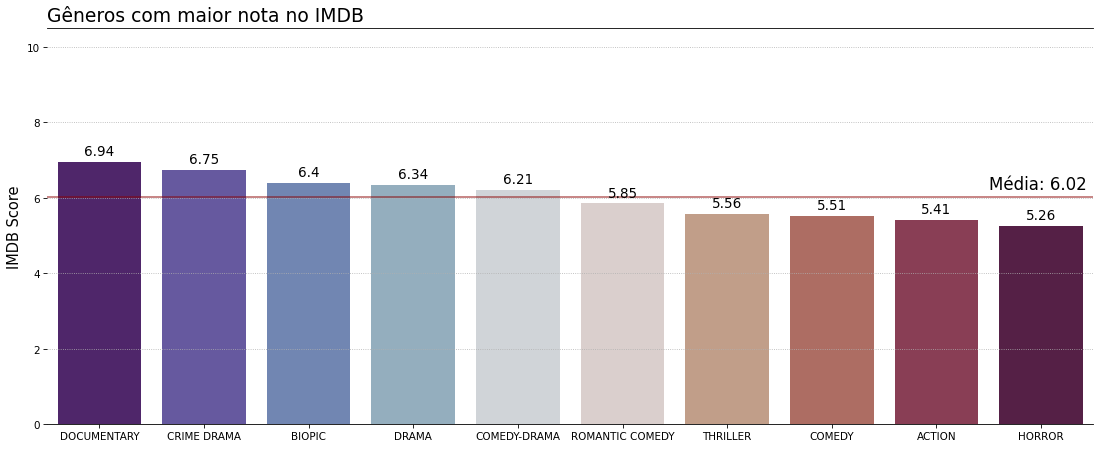

In [24]:
#plots Gêneros com maior nota no IMDB

#plot
fig, ax = plt.subplots(figsize=(18, 7), dpi=75)
sns.barplot(data = db_10genre,y = 'IMDB Score', x = 'Genre', palette= 'twilight_shifted')

#eixos
xmin, xmax = ax.get_xlim()
ymin, ymax = ax.get_ylim()

#títulos & Eixos
ax.set_title ("Gêneros com maior nota no IMDB", 
              loc = 'left', 
              fontsize = 18)
ax.set_ylim(0,10.5)
ymean = db_10genre['IMDB Score'].mean()
yline = ax.axhline(ymean, linestyle='solid', alpha=0.6, color = 'darkred')
ax.text(s = f'Média: {round(ymean,2)}',
       x = 8.5,y = ymean + 0.2,
       fontsize = 16)
ax.grid(axis = 'y',linestyle = 'dotted')
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.set_xlabel('')
ax.set_ylabel('IMDB Score', fontsize = 14)
ax.set_xticklabels(db_10genre["Genre"].str.upper())

#verificar tuplas
#for row in db_10genre.itertuples():
#    print(row)

#Colocar pontos das notas (row _3).
number_list = [0,1,2,3,4,5,6,7,8,9]
ticks = db_10genre.reset_index(drop=True)
for i in number_list:
    ax.text(x = i, y = ticks['IMDB Score'][i]+0.1, s=round(ticks['IMDB Score'][i], 2), horizontalalignment= 'center', verticalalignment='bottom', fontsize=13)

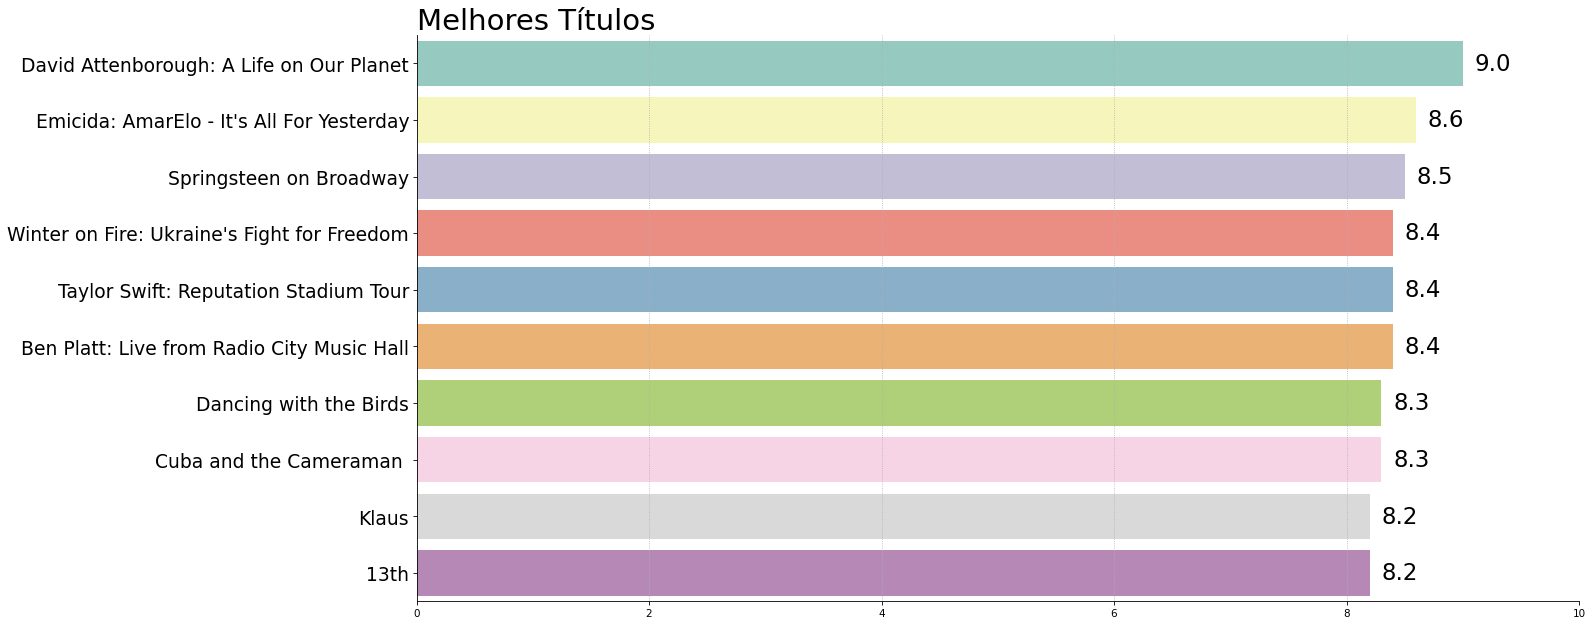

In [25]:
#Melhores Títulos

#plot
fig, ax = plt.subplots(figsize=(20, 10), dpi=75)
sns.barplot(data = db_imdbscore, x = 'IMDB Score', y = 'Title', palette = 'Set3')

#títulos & Eixos
xmin, xmax = ax.get_xlim()
ymin, ymax = ax.get_ylim()
ax.set_title ("Melhores Títulos", 
              loc = 'left', 
              fontsize = 28)
ax.set_xlim(0,10)
ax.grid(axis = 'x',linestyle = 'dotted')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_xlabel('')
ax.set_ylabel('')
ax.set_yticklabels(db_imdbscore['Title'], fontsize = 18)

#verificar tuplas
#for row in db_10genre.itertuples():
#    print(row)

#Colocar pontos das notas (row _3).
number_list = [0,1,2,3,4,5,6,7,8,9]
ticks = db_imdbscore.reset_index(drop=True)
for i in number_list:
    ax.text(y = i, x = ticks['IMDB Score'][i]+0.1, 
            s = ticks['IMDB Score'][i], 
            horizontalalignment= 'left', verticalalignment='center', 
            fontsize=22
           )

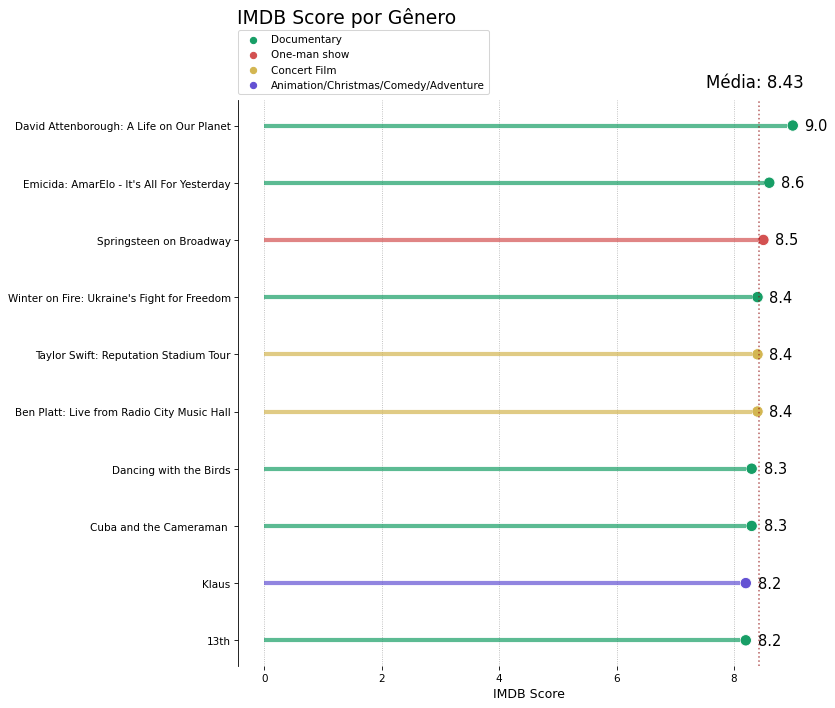

In [26]:
#cores
colors_div = ['#179E66', '#D35151', '#D3B651', '#6351D3']
colors_line = ['#179E66', '#179E66', '#D35151', '#179E66', '#D3B651', '#D3B651', '#179E66', '#179E66', '#6351D3', '#179E66']
#sns.palplot(colors_div)

#plot
fig, ax = plt.subplots(figsize=(10, 10), dpi=75)
sns.scatterplot(data = db_imdbscore, x = 'IMDB Score', y = 'Title',s =120, hue = 'Genre', palette = colors_div)

#eixos
xmin, xmax = ax.get_xlim()
ymin, ymax = ax.get_ylim()
mean = db_imdbscore['IMDB Score'].mean()

#títulos & Eixos
ax.text(s = 'IMDB Score por Gênero',
        x = -.46, y = ymax - 1.35,
        fontsize = 18)
ax.text(s = f'Média: {mean}',
        x = mean-0.9, y = -0.68,
        fontsize = 16)
ax.hlines(y=db_imdbscore["Title"], xmin=0, xmax=db_imdbscore["IMDB Score"]-0.09, color=colors_line, alpha=0.7, linewidth=4)
xmean = db_imdbscore['IMDB Score'].mean()
xline = ax.axvline(xmean, linestyle='dotted', alpha=0.6, color = 'darkred')
ax.grid(axis = 'x',linestyle = 'dotted')
ax.set_ylabel('')
ax.set_xlabel('IMDB Score', fontsize = 12)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.legend(loc = [0,1.01])

#para verificar tuplas utilizamos o códio abaixo. Tupla de IMBD Score = _5
#for row in db_imdbscore.itertuples():
#    print(row)
    
#XTICKS
for row in db_imdbscore.itertuples():
    ax.text(row._5+0.4, row.Title, s=round(row._5, 2), horizontalalignment= 'center', verticalalignment='center', fontsize=14)


### Extra: Títulos em Portugês

Por curiosidade, podemos ver o desempenho de filmes em portugues.

In [27]:
#Movies in Portuguese
db_pt = db[db['Language'] == 'Portuguese']
db_pt.sort_values('IMDB Score', ascending= False)

,Title,Genre,Premiere,Runtime,IMDB Score,Language,First Language,Year
582,Emicida: AmarElo - It's All For Yesterday,Documentary,"December 8, 2020",89,8.6,Portuguese,Portuguese,2020
494,The Edge of Democracy,Documentary,"June 19, 2019",121,7.2,Portuguese,Portuguese,2019
419,Laerte-se,Documentary,"May 19, 2017",100,6.9,Portuguese,Portuguese,2017
377,Just Another Christmas,Comedy,"December 3, 2020",101,6.7,Portuguese,Portuguese,2020
271,Get the Goat,Comedy,"March 18, 2021",97,6.3,Portuguese,Portuguese,2021
278,Porta dos Fundos: The Last Hangover,Comedy,"December 21, 2018",44,6.3,Portuguese,Portuguese,2018
237,The Killer,Western,"November 10, 2017",99,6.1,Portuguese,Portuguese,2017
177,Rich in Love,Romantic comedy,"April 30, 2020",105,5.8,Portuguese,Portuguese,2020
128,Double Dad,Comedy-drama,"January 15, 2021",103,5.6,Portuguese,Portuguese,2021
110,Get the Grift,Comedy,"April 28, 2021",94,5.5,Portuguese,Portuguese,2021


Text(0.5, 1.0, 'Títulos em Pt-Br por Gênero')

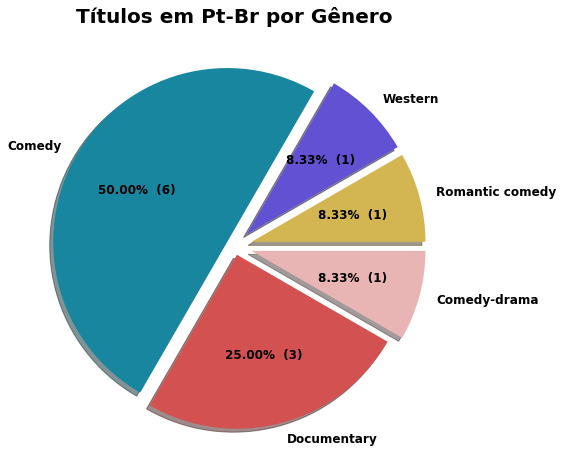

In [28]:
#Algumas adaptações
db_ptcount = db_pt['Genre'].value_counts().to_frame().reset_index().rename(columns={'index':'Genre','Genre':'Count'})
db_ptcountlist = db_ptcount['Count'].to_list()

#cores
colors_mix = ["#17869E", '#D35151', '#E9B4B4', '#D3B651', '#6351D3']
#sns.palplot(colors_mix)

#autopct
def make_autopct(db_ptcountlist):
    def my_autopct(pct):
        total = sum(db_ptcountlist)
        val = int(round(pct*total/100.0))
        return '{p:.2f}%  ({v:d})'.format(p=pct,v=val)
    return my_autopct

#plot
f, ax = plt.subplots(figsize=(12, 8))
ax.pie(x = db_ptcount['Count'],
       labels = db_ptcount['Genre'],
       startangle=60,
       autopct = make_autopct(db_ptcountlist),
       shadow = True,
       colors = colors_mix,
       explode = (0.05, 0.05, 0.1, 0.1, 0.1),
       textprops = {'fontsize': 12, 'color': 'black', 'weight':'bold'}
      )

#title
ax.set_title('Títulos em Pt-Br por Gênero', 
             fontsize = 20, loc = 'center', 
             weight="bold"
            )



Dominância do gênero comédia, presente em 8 dos 12 títulos!

C:\Users\lucas\AppData\Local\Temp/ipykernel_14248/2833949911.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(db_pt["Title"].str.upper(), rotation=90, fontdict={'horizontalalignment': 'right', 'size':11})


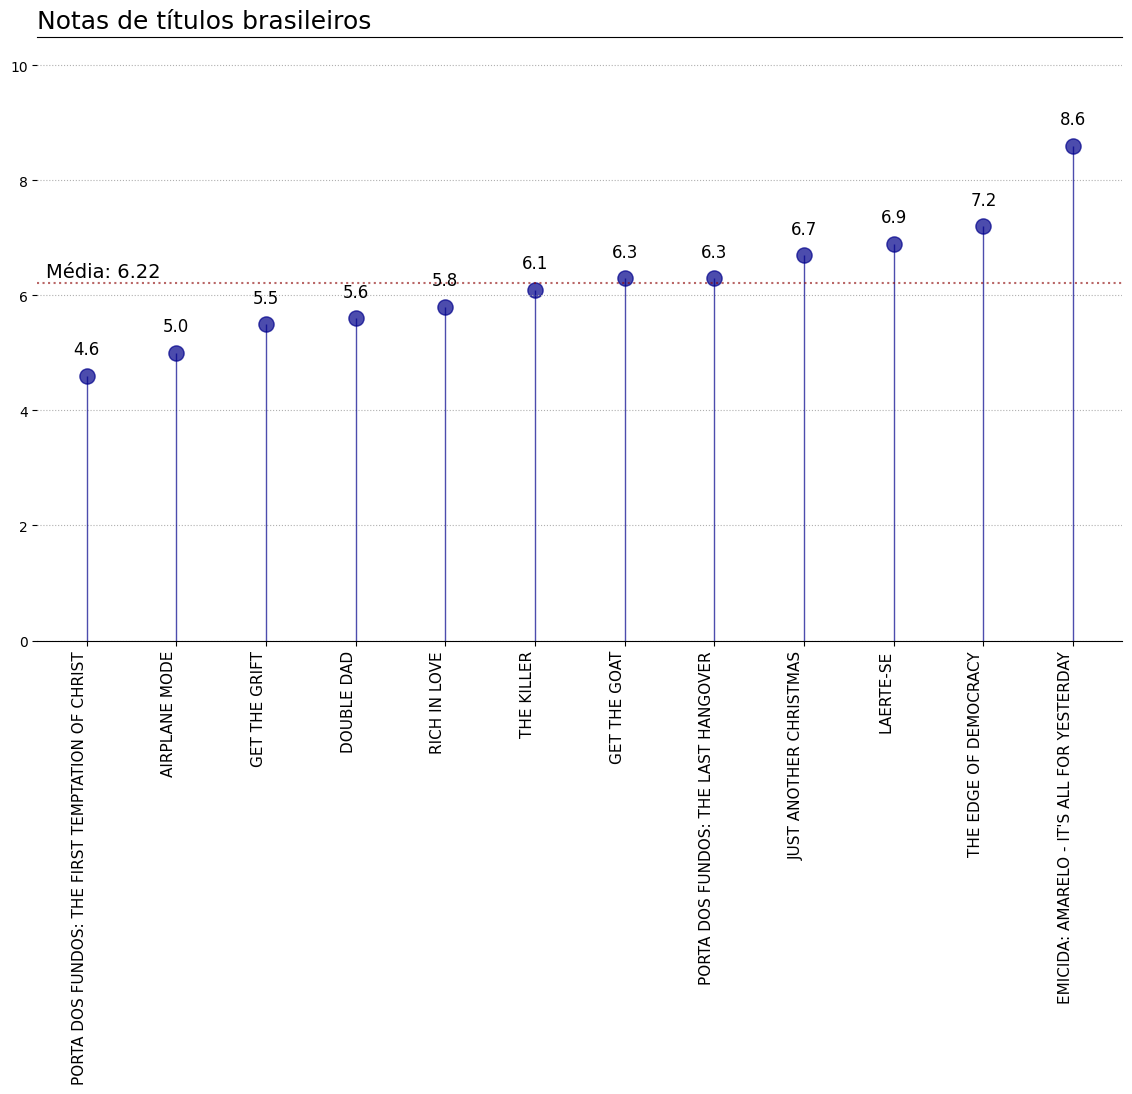

In [29]:
#Títulos Brasileiros por nota

#Criar plot
fig, ax = plt.subplots(figsize=(14,8), dpi= 100)
ax.vlines(x=db_pt["Title"], ymin=0, ymax=db_pt["IMDB Score"], color='darkblue', alpha=0.7, linewidth=1)
ax.scatter(x=db_pt["Title"], y=db_pt["IMDB Score"], s=120, color='darkblue', alpha=0.7)

#Títulos & Eixos
ax.set_title ("Notas de títulos brasileiros", loc = 'left', fontsize = 18)
ax.set_xticklabels(db_pt["Title"].str.upper(), rotation=90, fontdict={'horizontalalignment': 'right', 'size':11})
ax.set_ylim(0,10.5)
xmin, xmax = ax.get_xlim()
ymin, ymax = ax.get_ylim()
ymean = db_pt['IMDB Score'].mean()
yline = ax.axhline(ymean, linestyle='dotted', alpha=0.6, color = 'darkred')
ax.text(s = f'Média: {round(ymean,2)}', x = xmin + 0.1, y = ymean + 0.1, fontsize = 14)
ax.grid(axis = 'y',linestyle = 'dotted')
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

#Para verificar tuplas utilizamos o códio abaixo. Tupla de IMBD Score = _5
#for row in db_pt.itertuples():
#    print(row)

#Colocar pontos das notas.
for row in db_pt.itertuples():
    ax.text(row.Title, row._5+.3, s=round(row._5, 2), horizontalalignment= 'center', verticalalignment='bottom', fontsize=12)